In [1]:
import numpy as np
import pandas as pd
from kshape.core import kshape, zscore

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
eth_hour = pd.read_csv("../dat/bittrex/tickdat/usdt_eth_hour.csv")
datxs = (pd.to_datetime(eth_hour.date) - pd.to_datetime(eth_hour.date)[0]).dt.total_seconds() / 3600
y = np.log10(eth_hour.close)

In [5]:
# let's start off looking at 24-hour segments, checking the segments that start every 6 hours
nsegs = int(np.floor(y.shape[0] / 6) - 3)
tseries = np.zeros((nsegs, 24))
for i in range(nsegs):
    tseries[i, :] = y[6 * i:6 *i + 24]
tseries

array([[ 2.5728716 ,  2.57287159,  2.5259384 , ...,  2.53529412,
         2.53779014,  2.53754207],
       [ 2.54032947,  2.55308986,  2.55267914, ...,  2.55264388,
         2.55597666,  2.54966179],
       [ 2.53147892,  2.51955894,  2.53878731, ...,  2.5378191 ,
         2.51989359,  2.52244423],
       ..., 
       [ 2.48523544,  2.48567196,  2.48627008, ...,  2.48728304,
         2.48784512,  2.48295315],
       [ 2.4875432 ,  2.48401496,  2.48586333, ...,  2.48572143,
         2.48643048,  2.48643048],
       [ 2.49026882,  2.49117396,  2.49009901, ...,  2.4827307 ,
         2.48360869,  2.48245909]])

In [18]:
nclst = 15
clusters = kshape(zscore(tseries, axis=1), nclst)

In [21]:
def plot_clst(clusters, tseries):
    
    nclst = len(clusters)
    rows = int(np.ceil(nclst / 4))
    fig, axes = plt.subplots(rows, 4, figsize=(2 * rows, 8))
    
    i = 0
    for cen, ids in clusters:
        
        ax = axes.reshape(rows * 4)[i]
        
        for j in ids:
            ax.plot(zscore(tseries[j, :]), color="b", alpha=0.2)
        
        ax.plot(cen, color="g")
        
        i += 1
        
        
    fig.tight_layout()

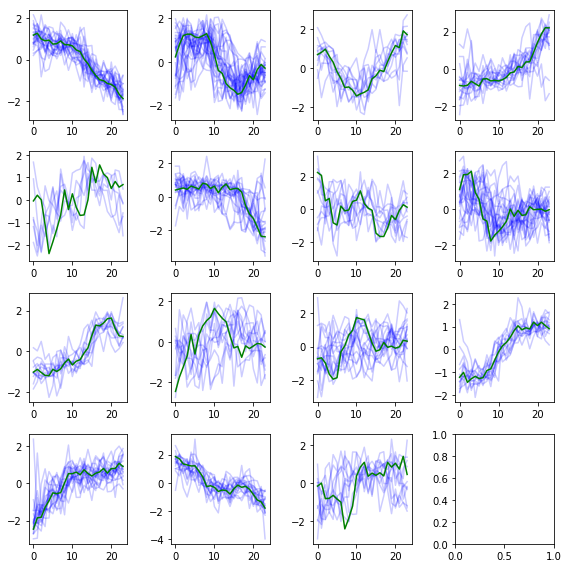

In [22]:
plot_clst(clusters, tseries)